<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML04_SVMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machines

##Linear SVM classifier

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal width and length
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svm', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)

###SGDClassifier(loss='hinge', alpha=1/(m*C))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

##Nonlinear SVM classifier

###Polynomial features

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
])

X, y = make_moons(noise=0.2)

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

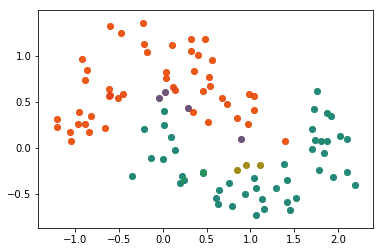

In [ ]:
import matplotlib.pyplot as plt

idx = (y == 1)
plt.scatter(X[idx][:,0], X[idx][:, 1])
plt.scatter(X[idx==False][:,0], X[idx==False][:, 1])

y_pred = polynomial_svm_clf.predict(X)
idx = (y_pred == 1)
plt.scatter(X[idx][:,0], X[idx][:, 1], alpha=0.4)
plt.scatter(X[idx==False][:,0], X[idx==False][:, 1], alpha=0.4)

###Polynomial kernel

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

###Similarity functions

$\phi_\gamma(x, l) = e^{(-l||x - l||^2)}$

In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

##SVM regression

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(100, 1, noise=40)

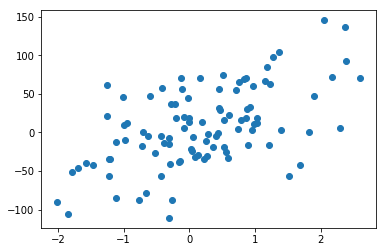

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVR(epsilon=1.5))
])

svm_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

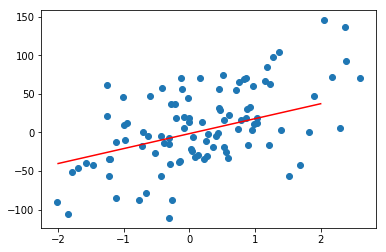

In [ ]:
plt.scatter(X, y)
plt.plot([-2, 2], svm_reg.predict([[-2], [2]]), c='r')

In [ ]:
X = np.linspace(-2, 2, 100)
y = 0.58 * X ** 2 + np.random.rand(100)

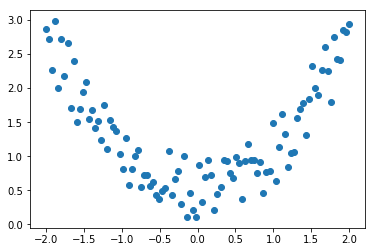

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.svm import SVR

polynomial_svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='poly', degree=2, C=100, epsilon=0.1))
])
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))
polynomial_svm_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

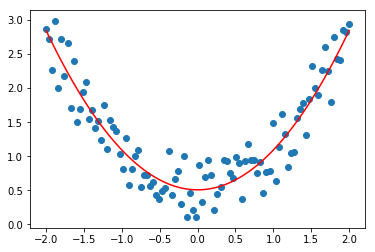

In [ ]:
plt.scatter(X,y)
plt.plot(np.linspace(-2, 2, 100), polynomial_svm_reg.predict(np.linspace(-2, 2, 100).reshape((-1, 1))), c='r')

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_moons(200, noise=0.4, random_state=42)

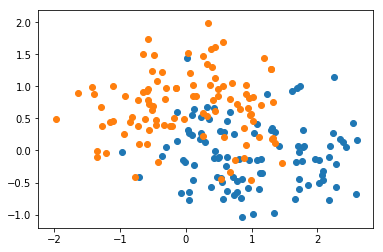

In [ ]:
plt.scatter(X[y==1][:, 0], X[y==1][:, 1])
plt.scatter(X[y==0][:, 0], X[y==0][:, 1])

In [ ]:
lin_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svm', LinearSVC(C=1, loss='hinge'))
])

X_train, X_test, y_train, y_test = X[:150], X[150:], y[:150], y[150:]

lin_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svm', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [ ]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('SGD_clf', SGDClassifier(loss='hinge', alpha=1/(200*1)))
])

SGD_svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGD_clf', SGDClassifier(alpha=0.005, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [ ]:
from sklearn.metrics import accuracy_score

print('Linear SVM:', accuracy_score(y_test, lin_svm_clf.predict(X_test)))
print('SVC:', accuracy_score(y_test, poly_kernel_svm_clf.predict(X_test)))
print('SGD SVM:', accuracy_score(y_test, SGD_svm_clf.predict(X_test)))

Linear SVM: 0.8
SVC: 0.82
SGD SVM: 0.8


In [ ]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
X, y =  mnist['data'], mnist['target']

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
len(X_train), len(y_train)

(60000, 60000)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = [{'C': np.linspace(0.01, 5, 20), 'penalty': ['l2'], 'loss': ['hinge',  'squared_hinge']}]

lin_svm_grid = GridSearchCV(LinearSVC(), grid_params, scoring='accuracy', cv=3, verbose=3, n_jobs=-1)
#lin_svm_grid.fit(X_train_scaled, y_train)

In [ ]:
#X_train, X_val, y_train, y_val = X_train_scaled[:50000], X_train_scaled[50000:], y_train[:50000], y_train[50000:]

In [ ]:
len(y_val), len(X_val)

(10000, 10000)

In [ ]:
lin_svm_clf = LinearSVC(loss='hinge')

#lin_svm_clf.fit(X_train, y_train)
#accuracy_score(y_val, lin_svm_clf.predict(X_val))

In [ ]:
sgd_svm = SGDClassifier(loss='hinge', alpha=1/(len(X_train)*1))
sgd_svm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=2e-05, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
accuracy_score(y_val, sgd_svm.predict(X_val))

0.9096

In [ ]:
grid_params = [{'alpha': 1 / (len(X_train)*np.linspace(0.1, 0.5, 5)), 'loss': ['hinge'], 'penalty': ['l1', 'l2']}]

sgd_svm_grid = GridSearchCV(SGDClassifier(), grid_params, scoring='accuracy', cv=4, verbose=5, n_jobs=-1)
sgd_svm_grid.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'alpha': array([1.66667e-04, 8.33333e-05, 5.55556e-05, 4.16667e-05, 3.33333e-05]), 'loss': ['hinge'], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=5)

In [ ]:
sgd_svm_grid.best_params_

{'alpha': 4.1666666666666665e-05, 'loss': 'hinge', 'penalty': 'l2'}

In [ ]:
sgd_svm_grid.best_score_

0.9126166666666666

In [ ]:
1 / (len(X_train)*np.linspace(0.01, 5, 20))

array([2.00000000e-03, 7.33590734e-05, 3.73647984e-05, 2.50659631e-05,
       1.88585608e-05, 1.51153540e-05, 1.26120146e-05, 1.08200456e-05,
       9.47394665e-06, 8.42572062e-06, 7.58634458e-06, 6.89905592e-06,
       6.32595305e-06, 5.84076237e-06, 5.42469665e-06, 5.06396588e-06,
       4.74821942e-06, 4.46953658e-06, 4.22175314e-06, 4.00000000e-06])

In [ ]:
accuracy_score(y_test, sgd_svm_grid.predict(scaler.transform(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9164

In [ ]:
grid_params = [
    {'kernel': ['rbf'], 'C': np.linspace(0.0001, 3, 5), 'gamma': np.linspace(0.01, 5, 5), 'decision_function_shape': ["ovr"]},
    {'kernel': ['poly'], 'C': np.linspace(0.0001, 3, 5), 'degree': np.linspace(2, 5, 3), 
     'decision_function_shape': ["ovr"]}
]

svm_grid = GridSearchCV(SVC(), grid_params, scoring='accuracy', cv=3, verbose=5, n_jobs=-1)

svm_grid.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([1.00000e-04, 7.50075e-01, 1.50005e+00, 2.25002e+00, 3.00000e+00]), 'gamma': array([0.01  , 1.2575, 2.505 , 3.7525, 5.    ]), 'decision_function_shape': ['ovr']}, {'kernel': ['poly'], 'C': array([1.00000e-04, 7.50075e-01, 1.50005e+00, 2.25002e+00, 3.00000e+00]), 'degree': array([2. , 3.5, 5. ]), 'decision_function_shape': ['ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=5)

In [ ]:
svm_grid.best_params_

{'C': 3.0, 'decision_function_shape': 'ovr', 'degree': 2.0, 'kernel': 'poly'}

In [ ]:
svm_grid.best_score_

0.821

In [ ]:
grid_params = [
    {'kernel': ['rbf'], 'C': np.linspace(3, 5, 5), 'gamma': ['auto'], 'decision_function_shape': ["ovr"]},
    {'kernel': ['poly'], 'C': np.linspace(2, 4, 5), 'degree': np.linspace(2, 4, 2), 
     'decision_function_shape': ["ovr"]}
]

svm_grid = GridSearchCV(SVC(), grid_params, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

svm_grid.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   37.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([3. , 3.5, 4. , 4.5, 5. ]), 'gamma': ['auto'], 'decision_function_shape': ['ovr']}, {'kernel': ['poly'], 'C': array([2. , 2.5, 3. , 3.5, 4. ]), 'degree': array([2., 4.]), 'decision_function_shape': ['ovr']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [ ]:
svm_grid.best_params_

{'C': 3.5, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
best_svm = svm_grid.best_estimator_

In [ ]:
best_svm.fit(X_train_scaled, y_train)

SVC(C=3.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, best_svm.predict(scaler.transform(X_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.9724

In [ ]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing() 
X = housing["data"] 
y = housing["target"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred = lin_svr.predict(X_train_scaled) 
mse = mean_squared_error(y_train, y_pred) 
mse

0.949968822217229

In [ ]:
np.sqrt(mse)

0.9746634404845752

In [ ]:
from sklearn.svm import SVR 
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import reciprocal, uniform 

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)} 
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42) 
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.7s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.6s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.8s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=  10.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.8s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=  10.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   9.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   9.1s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f11d6d116a0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f11d3cb8470>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled) 
mse = mean_squared_error(y_train, y_pred) 
np.sqrt(mse)

0.5727524770785356

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred) 
np.sqrt(mse)

0.592916838552874